# Preprocessing in Python

Let's look at doing some preprocessing using pandas and scikit-learn in Python.

First of all, we need to import the packages we want to use: numpy, pandas and scikit-learn.

# Required Libraries

```conda install scikit-learn```

or

```pip install scikit-learn```

In [69]:
# For data analysis
import numpy as np
import pandas as pd
import sklearn as sk

# For graphing/visualisations
import matplotlib.pyplot as plt
#import seaborn as sns

## Opening the data file
Now we need to open the abalone file. We do this using pandas. You can search for these in the pandas help yourself, but the functions of interest are:
- `pandas.read_csv` and `pandas.to_csv` to read and write CSV files.
- `pandas.read_excel` and `pandas.to_excel` to read and write MS Excel files

We're going to open the abalone file. Note: you will need to edit the code to ensure that it points to where you have downloaded the `abalone-small.xls` file.

In [70]:
abalone_data_path = "./Dataset/abalone-small.xls"
abalone_data = pd.read_excel(abalone_data_path)

# Abalone Data Description

Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description
-----------------------------

| Name            | Data Type    | Measurement Unit    | Description        |
|:----------------|:------------|:-------|:-----------------------------|
| Sex            | nominal    | --    | M, F, and I (infant)        |
| Length         | continuous | mm    | Longest shell measurement   |
| Diameter       | continuous | mm    | perpendicular to length     |
| Height         | continuous | mm    | with meat in shell          |
| Whole weight   | continuous | grams | whole abalone               |
| Shucked weight | continuous | grams | weight of meat              |
| Viscera weight | continuous | grams | gut weight (after bleeding) |
| Shell weight   | continuous | grams | after being dried           |
| Rings          | integer    | --    | +1.5 gives the age in years |

## Taking a quick look at the data
You can of course just display the variable or use `.head()`, `.tail()` or `.sample()` to see the top or bottom of the dataset. We can also quickly check the `head` **and** `tail` with the `.concat()` function to join two tables together along the row axis.

### Concatenate
>In formal language theory and computer programming, string concatenation is the operation of joining character strings end-to-end. For example, the concatenation of "snow" and "ball" is "snowball".

In [71]:
#abalone_data.head()
#abalone_data.tail()
pd.concat([abalone_data.head(), abalone_data.tail()])

,Index,Sex,Length,Diameter,Height,Gross mass,Meat mass,Gut mass,Shell mass,Age
0,608,I,97,74,26,91.6,36.2,22.6,27.2,10
1,1257,I,85,62,18,60.2,27.7,13.0,16.0,7
2,2203,M,114,81,32,184.9,68.9,43.7,59.0,19
3,1377,M,124,102,35,256.3,114.3,47.7,78.0,10
4,2242,F,87,64,24,75.7,30.4,18.3,25.0,11
15,3730,M,102,76,27,136.2,68.7,28.4,34.0,9
16,852,M,111,87,29,193.7,99.7,33.6,47.7,9
17,2870,I,74,56,17,39.6,16.1,9.1,11.6,5
18,1472,M,106,80,25,151.5,79.6,30.2,35.0,8
19,1542,I,72,55,15,44.1,19.7,8.8,13.2,7


In [72]:
# Check the shape the abalone data
abalone_data.shape

(20, 10)

You can see the column names with `.columns` and the row indices with `.index`.

In [73]:
# To access the columns of the data
abalone_data.columns

Index(['Index', 'Sex', 'Length', 'Diameter', 'Height', 'Gross mass',
       'Meat mass', 'Gut mass', 'Shell mass', 'Age'],
      dtype='object')

In [79]:
abalone_data.describe()

,Index,Length,Diameter,Height,Gross mass,Meat mass,Gut mass,Shell mass,Age
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000
mean,1556.400000,92.450000,71.000000,24.050000,121.16000,53.990000,25.24500,34.765000,9.600000
std,943.023324,24.841551,20.442474,7.776314,96.03225,43.702161,19.34331,27.587951,3.925624
min,234.000000,47.000000,32.000000,12.000000,10.90000,5.300000,1.90000,3.000000,4.000000
25%,791.000000,73.500000,55.750000,17.000000,42.97500,18.800000,9.02500,12.800000,7.000000
50%,1503.500000,95.000000,74.000000,23.000000,90.30000,34.450000,20.20000,28.600000,9.000000
75%,2212.750000,111.750000,82.500000,29.750000,187.10000,83.700000,36.12500,50.525000,11.000000
max,3730.000000,130.000000,102.000000,36.000000,358.60000,160.100000,67.80000,106.000000,19.000000


## Preprocessing the data

First, let's look at scaling (normalising) the data. We do this with the following:

- `sklearn.preprocessing.StandardScaler` for Z-score normalisation
- `sklearn.preprocessing.MinMaxScaler` for min-max normalisation

For each, you `.fit` to work out the scaler setting (e.g., the mean and variance) then `.transform` when you want to use it. That means you can do scale different DataFrames in the same way. If you want to do both together, then you can just use `.fit_transform`.

In [13]:
# Drop the column "Sex"
abalone_subdata = abalone_data.drop(['Sex'],axis=1)
abalone_subdata.head()

,Index,Length,Diameter,Height,Gross mass,Meat mass,Gut mass,Shell mass,Age
0,608,97,74,26,91.6,36.2,22.6,27.2,10
1,1257,85,62,18,60.2,27.7,13.0,16.0,7
2,2203,114,81,32,184.9,68.9,43.7,59.0,19
3,1377,124,102,35,256.3,114.3,47.7,78.0,10
4,2242,87,64,24,75.7,30.4,18.3,25.0,11


Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

In [14]:
# Performing a Standard scaler transform of the Abalone dataset

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
std_scaler = StandardScaler()
data = std_scaler.fit_transform(abalone_subdata)

# convert the array back to a dataframe
dataset = pd.DataFrame(data,columns=['Index','Length', 'Diameter', 'Height', 'Gross mass',
       'Meat mass', 'Gut mass', 'Shell mass', 'Age'])

# summarize
dataset.describe()

# Check mean & Standard dev

,Index,Length,Diameter,Height,Gross mass,Meat mass,Gut mass,Shell mass,Age
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-6.956241e-17,-1.443290e-16,-5.551115e-18,-9.992007e-17,4.440892e-17,-2.053913e-16,-2.109424e-16,-4.440892e-17,6.106227e-17
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-1.438728e+00,-1.877126e+00,-1.957354e+00,-1.589833e+00,-1.177983e+00,-1.143076e+00,-1.238230e+00,-1.181320e+00,-1.463583e+00
25%,-8.327300e-01,-7.826520e-01,-7.653756e-01,-9.301512e-01,-8.353039e-01,-8.261417e-01,-8.603165e-01,-8.168644e-01,-6.795209e-01
50%,-5.755346e-02,1.053173e-01,1.505657e-01,-1.385332e-01,-3.296985e-01,-4.587329e-01,-2.675892e-01,-2.292724e-01,-1.568125e-01
75%,7.140872e-01,7.971073e-01,5.771685e-01,7.520371e-01,7.044822e-01,6.974899e-01,5.770804e-01,5.861044e-01,3.658959e-01
max,2.364805e+00,1.550849e+00,1.555845e+00,1.576639e+00,2.536734e+00,2.491103e+00,2.257137e+00,2.649184e+00,2.456729e+00


array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Gross mass'}>,
        <AxesSubplot:title={'center':'Meat mass'}>],
       [<AxesSubplot:title={'center':'Gut mass'}>,
        <AxesSubplot:title={'center':'Shell mass'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

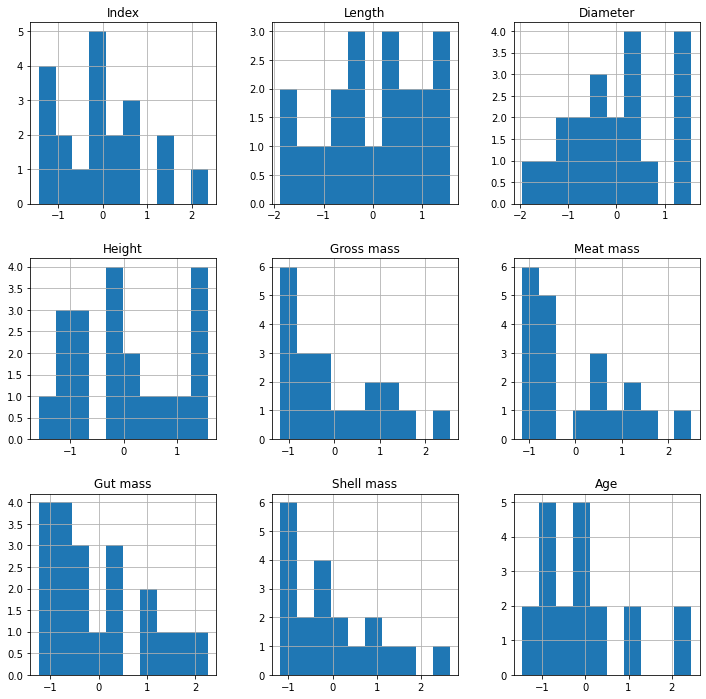

In [15]:
# histograms of the variables

dataset.hist(figsize=(12,12))
#pyplot.show()

In [17]:
# Performing a minmax scaler transform of the Abalone dataset
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
min_max = MinMaxScaler()
data1 = min_max.fit_transform(abalone_subdata)

# convert the array back to a dataframe
dataset1 = pd.DataFrame(data1,columns=['Index','Length', 'Diameter', 'Height', 'Gross mass',
       'Meat mass', 'Gut mass', 'Shell mass', 'Age'])

# summarize
#print(dataset1.describe())
dataset1.describe()

,Index,Length,Diameter,Height,Gross mass,Meat mass,Gut mass,Shell mass,Age
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.378261,0.547590,0.557143,0.502083,0.317112,0.314535,0.354249,0.308398,0.373333
std,0.269744,0.299296,0.292035,0.324013,0.276193,0.282314,0.293525,0.267844,0.261708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.159325,0.319277,0.339286,0.208333,0.092249,0.087209,0.108118,0.095146,0.200000
50%,0.363129,0.578313,0.600000,0.458333,0.228358,0.188307,0.277693,0.248544,0.333333
75%,0.566004,0.780120,0.721429,0.739583,0.506759,0.506460,0.519347,0.461408,0.466667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


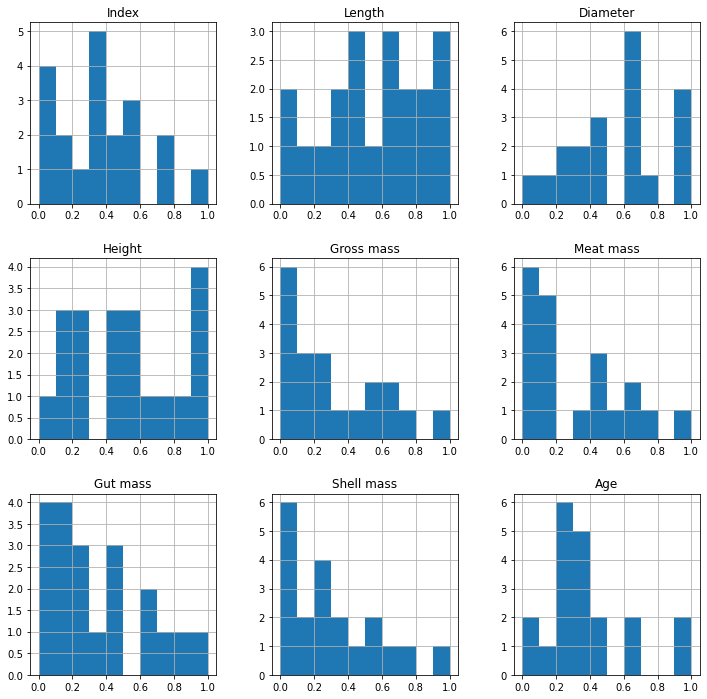

In [20]:
# histograms of the variables
dataset1.hist(figsize=(12,12))
pyplot.show()

          Height
count  20.000000
mean    0.012500
std     1.944078
min    -3.000000
25%    -1.750000
50%    -0.250000
75%     1.437500
max     3.000000


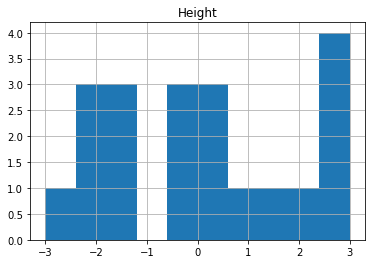

In [27]:
# Performing a minmax scaler transform of the Abalone dataset with range (-3,3)
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

min_max = MinMaxScaler(feature_range=(-3,3))
data3 = min_max.fit_transform(abalone_subdata["Height"].values.reshape(-1, 1))

# convert the array back to a dataframe
dataset3 = pd.DataFrame(data3,columns=['Height'])

# summarize
print(dataset3.describe())

# histograms of the variables
dataset3.hist()
pyplot.show()

## Other preprocessing classess of interest

You might also be interested in 
`sklearn.preprocessing.OneHotEncoder` and `sklearn.preprocessing.LabelBinarizer` (for the target column). These do a one hot encoding of the data and labels respectively. Note: these are quite different in older versions of scikit-learn.

There is also `sklearn.preprocessing.KBinsDiscretizer` which does binning. Again, this only exists in newer versions of scikit-learn, so you may need to write yourself if it isn't there.

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(dtype=int,sparse=False)
amalone_sex=onehot.fit_transform(abalone_data[['Sex']])
amalone_sex= pd.DataFrame(amalone_sex,columns=['Female', 'Male', 'Infant'])
amalone_sex


,Female,Male,Infant
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
5,0,1,0
6,0,0,1
7,0,1,0
8,0,1,0
9,0,1,0


Just like categorical data can be encoded, numerical features can be ‘decoded’ into categorical features. 
The two most common ways to do this are discretization and binarization.

Discretization:also known as quantization or binning, divides a continuous feature into a pre-specified number of categories (bins)

Equi-width and Equi-depth: In both cases, the strategy parameter determines whether equi-width or equi-depth binning is used. For equi-width, set strategy='uniform', and for equi-depth, set strategy='quantile'.

The transformed data will contain the bin indices for each data point, which can be interpreted as categories.

In [60]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
num_bins = 5
height=abalone_data[['Height']]

# Initialize KBinsDiscretizer for equi-width binning
equi_width_binner = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')

# Fit and transform the data
equi_width_bins = equi_width_binner.fit_transform(height)
#print(equi_width_bins)
equi_width_bins_height= pd.DataFrame(equi_width_bins,columns=['Height'])
equi_width_bins_height

,Height
0,2.0
1,1.0
2,4.0
3,4.0
4,2.0
5,2.0
6,4.0
7,1.0
8,0.0
9,2.0


In [64]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

num_bins = 5
height=abalone_data[['Height']]

# Initialize KBinsDiscretizer for equi-depth binning
equi_depth_binner = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')

# Fit and transform the data
equi_depth_bins_height = equi_depth_binner.fit_transform(height)
equi_depth_bins_height= pd.DataFrame(equi_depth_bins_height,columns=['Height'])
#print(equi_depth_bins)
equi_depth_bins_height


# Adding 1 to bin numbers and converting them to strings
abalone_subdata2 = pd.DataFrame(equi_depth_bins_height + 1, columns=['Height'])
abalone_subdata2['Height'] = 'bin' + abalone_subdata2['Height'].astype(str)

abalone_subdata2


,Height
0,bin4.0
1,bin2.0
2,bin4.0
3,bin5.0
4,bin3.0
5,bin3.0
6,bin5.0
7,bin2.0
8,bin1.0
9,bin3.0


In [65]:

# Removing the decimal part from bin labels
abalone_subdata2['Height'] = abalone_subdata2['Height'].str.replace('.0', '')
abalone_subdata2

/var/folders/km/wzd3kp6d7cjdr_b8fqz4lhqc0000gn/T/ipykernel_33252/1908782867.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  abalone_subdata2['Height'] = abalone_subdata2['Height'].str.replace('.0', '')


,Height
0,bin4
1,bin2
2,bin4
3,bin5
4,bin3
5,bin3
6,bin5
7,bin2
8,bin1
9,bin3


In [36]:
abalone_data['Length']

0      97
1      85
2     114
3     124
4      87
5      82
6     130
7      60
8      55
9     100
10    125
11     47
12    121
13     64
14     93
15    102
16    111
17     74
18    106
19     72
Name: Length, dtype: int64

In [37]:
abalone_data['Length'].describe()

count     20.000000
mean      92.450000
std       24.841551
min       47.000000
25%       73.500000
50%       95.000000
75%      111.750000
max      130.000000
Name: Length, dtype: float64

In [39]:
# Example ages
#ages = [2, 8, 15, 30, 60]

# Define the age bins and labels
#age_bins = [0, 5, 10, 20, float('inf')]  # Bin edges
#age_bins = [0, 5, 10, 20, 61]
#age_labels = ['Baby', 'Kids', 'Adults', 'Old Age']

# Create a pandas DataFrame
#data = pd.DataFrame({'Age': ages})

# Use the cut() function to categorize ages
#data['Age Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

#print(data)

In [38]:
length=abalone_data['Length']
length_bins = [47, 60, 90, 110, float('inf')]
length_labels = ['small', 'medium', 'large', 'very large']

# Create a pandas DataFrame
data = pd.DataFrame({'Length': length})
# Use the cut() function to categorize ages
data['Length Category'] = pd.cut(data['Length'], bins=length_bins, labels=length_labels, right=False)

print(data)

    Length Length Category
0       97           large
1       85          medium
2      114      very large
3      124      very large
4       87          medium
5       82          medium
6      130      very large
7       60          medium
8       55           small
9      100           large
10     125      very large
11      47           small
12     121      very large
13      64          medium
14      93           large
15     102           large
16     111      very large
17      74          medium
18     106           large
19      72          medium


# Missing Values

In [66]:
imports_data_path = "./Dataset/imports-mod.csv"
imports_data = pd.read_csv(imports_data_path)

In [67]:
#checks out how many null info are on the dataset
imports_data.isnull().sum()

Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
date                 0
dtype: int64

In [68]:
# Replace "?" with NaN to identify missing values
imports_data.replace("?", pd.NA, inplace=True)

# Check for missing values
missing_values = imports_data.isna()

#print(missing_values)
imports_data.isnull().sum()

Unnamed: 0            0
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
date                  0
dtype: int64

# Exercise

1) Load the iris data used in previous weeks to a pandas dataframe

2) Create a "data dictionary" describing the dataset's attributes (as above).

3) perform standard normalisation on a copy of the dataset

4) Perform min-max normalisation on a copy of the dataset

5) On the either the min-maxed or normalised dataset, perform one-hot encoding on the "species" attribute.

6) look for how to replace missing values with mean, median,...